# rCCA plots
### download from R, plot in python

In [3]:
import pandas as pd
import numpy as np


# Append system path to look for additional modules (needed for rcca)
import sys
sys.path.append("/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Packages/")
sys.path.append("/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/kim_code/")

# Import self-build script
import radiogenomics as r

#Plotly 
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

import seaborn as sns


### Download results

In [4]:
cv_score_path = '/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Output_Data/rCCA_CV_scores_0.0001_2_100_57Subjects'

grid = '/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Output_Data/grid_0.0001_2_100'

rcca_scree = '/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Output_Data/rCCA_scree_57Subjects'

In [5]:
# Matrix
df = pd.read_csv(cv_score_path)
grid = pd.read_csv(grid)

# Get index list, round to 4 decimals
index_list = list(grid['x'])
index_list = [ '%.4f' % elem for elem in index_list ]

# Drop current "index"
df.drop('Unnamed: 0', inplace=True, axis=1)

# set rows and columns (symmetric)
df.index = index_list
df.columns = index_list

In [6]:
# Find max and related index/columns
max_score = df.iloc[0,0]
index = list(df.index)[0]
col = list(df.columns)[0]

for index_row, row in df.iterrows():
    for index_column, dist in row.iteritems():
        if df.loc[index_row,index_column] > max_score:
            max_score = df.loc[index_row,index_column]
            index = index_row
            col = index_column
print("Max_socre is: ", max_score)
print(df.max().max().round(4))

Max_socre is:  0.230226296888615
0.2302


### WHY IS THERE NEGATIVE CV-SCORES BELOW?

[Text(33,0.5,'Lambda1'), Text(0.5,15,'Lambda2')]

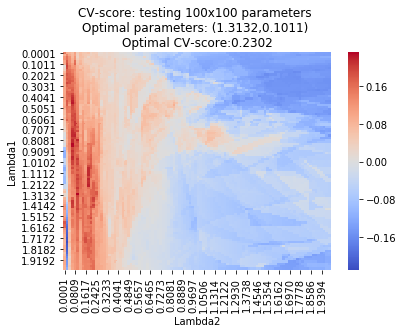

In [7]:
# Plot
# MAKE SURE THAT INDEX/COL is CORRECT WITH LAMBDA1 / LAMBDA2
fig = sns.heatmap(df, cmap="coolwarm")
fig.set_title("CV-score: testing " + str(len(index_list))+"x" + str(len(index_list)) + " parameters \n" + 
             "Optimal parameters: (" +  index + "," + col +") \n" +
             "Optimal CV-score:" + str(max_score.round(4)))
fig.set(xlabel='Lambda2', ylabel='Lambda1')

### Scree

In [8]:
# Matrix
df = pd.read_csv(rcca_scree)
df.set_index('Unnamed: 0', inplace=True)

In [9]:
data_scree = r.plotly_rcca_scree(df['x'])

# Plot layout
layout=Layout(
        yaxis=YAxis(title='Canonical Correlatioon'),
        xaxis=XAxis(title='Dimension'),
        title='rCCA Scree Plot')


fig_scre = Figure(data=data_scree, layout=layout)
py.iplot(fig_scre)